In [1]:
import pandas as pd

In [2]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [23]:
df = pd.read_csv("titanic.csv")

In [24]:
df.shape

(891, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [26]:
print("First 5 rows:")
df.head(5)

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
print("Last 5 rows:")
df.tail(5)

Last 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [28]:

df[df['survived'] == 1]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Q3: Select sex, fare, survived columns

In [32]:
selected_columns = ['sex', 'fare', 'survived']
selected_data = df[selected_columns]
selected_data

,sex,fare,survived
0,male,7.2500,0
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,0
...,...,...,...
886,male,13.0000,0
887,female,30.0000,1
888,female,23.4500,0
889,male,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [33]:
# Create the new column by combining class and embark_town
df['new_column'] = df['class'] + ' - ' + df['embark_town']

# Print the updated DataFrame
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third - Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First - Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third - Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First - Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third - Southampton


# Q5: Remove new_column from the DataFrame

In [38]:
df = df.drop('new_column', axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q6: Filter DataFrame for rows of survived Males only

In [39]:
df[(df['survived'] == 1) & (df['sex'] == 'male')]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


,age,class
17,NaN,Second
21,34.0,Second
23,28.0,First
36,NaN,Third
55,NaN,First
...,...,...
838,32.0,Third
839,NaN,First
857,51.0,First
869,4.0,Third


# Q7: The total number of males who survived

In [52]:
total_males_survived = len(df[(df['survived'] == 1) & (df['sex'] == 'male')])
print("survived:", total_males_survived)

survived: 109


# Q8: How many values in each class?

In [50]:
# Count the number of values in each class
class_counts = df['class'].value_counts()

# Print the class counts
print(class_counts)

Third     491
First     216
Second    184
Name: class, dtype: int64


# Import Seaborn

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Q9: Draw barplot represents survived people based on sex

<Axes: xlabel='sex', ylabel='survived'>

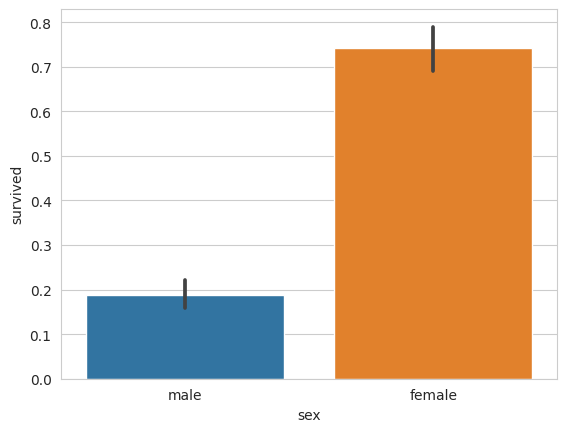

In [60]:
sns.barplot(x=df['sex'],y=df['survived']==1)

# Q10: Draw catplot represents survived people based on embarked

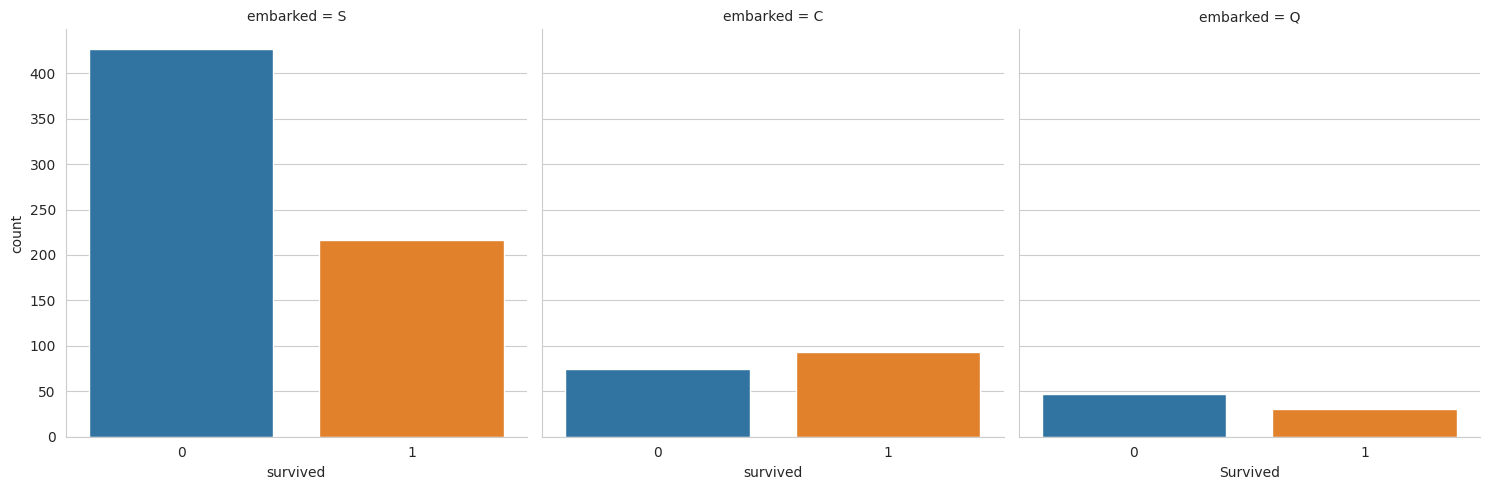

In [67]:

sns.catplot(data=df, x='survived', col='embarked', kind='count')
plt.xlabel('Survived')
plt.ylabel('Count')

# Display the plot
plt.show()

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

<Axes: xlabel='sex', ylabel='age'>

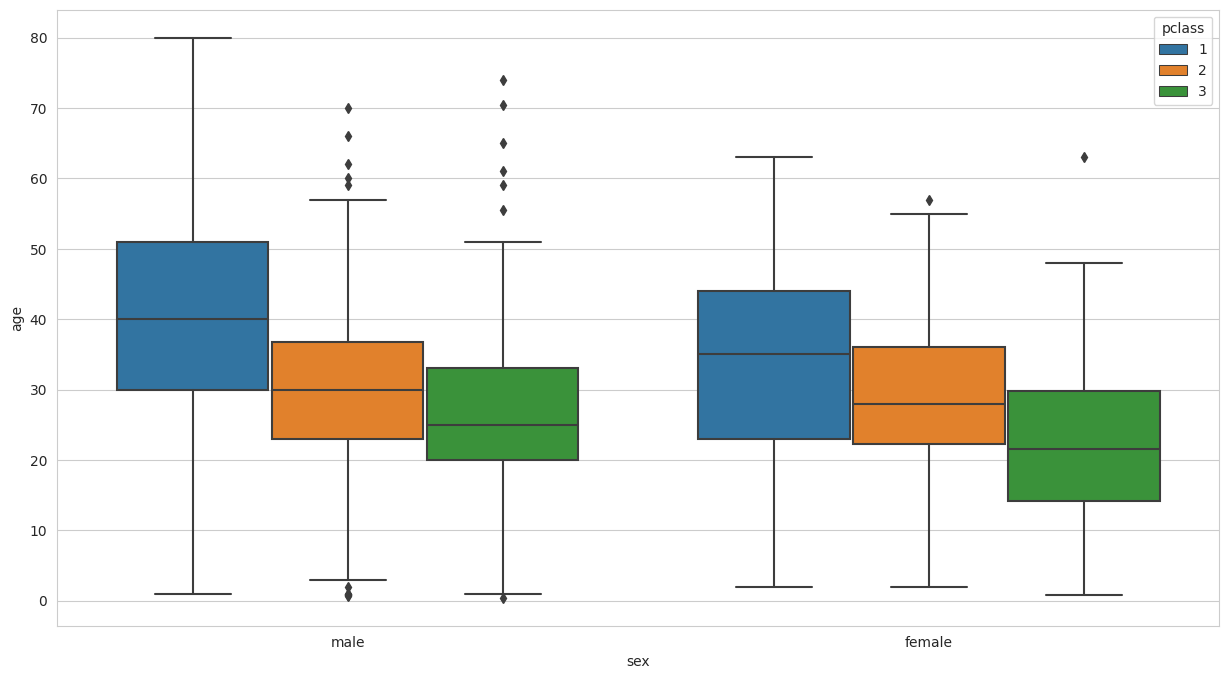

In [77]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x="sex",
    y="age",
    hue="pclass",
    data=df)

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

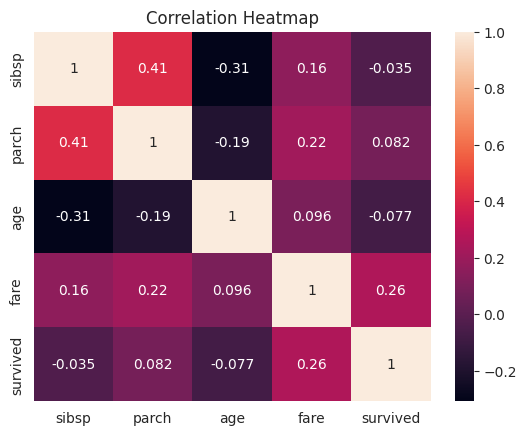

In [81]:
# Select the columns for correlation
selected_columns = ['sibsp', 'parch', 'age', 'fare', 'survived']
correlation_matrix = df[selected_columns].corr()


sns.heatmap(correlation_matrix, annot=True)

# Set the plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# Q13: Draw factorplot represents the relation between sibsp and survived columns

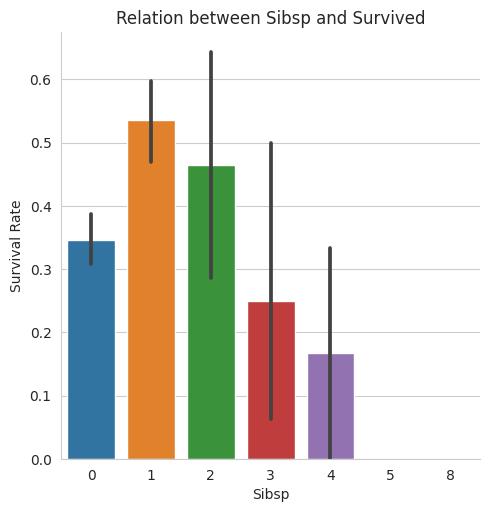

In [105]:



# Draw the catplot
sns.catplot(data=df, x='sibsp', y='survived', kind='bar')

# Set the plot title and labels
plt.title('Relation between Sibsp and Survived')
plt.xlabel('Sibsp')
plt.ylabel('Survival Rate')

# Display the plot
plt.show()

# Q14: Draw extra insights [Optional]

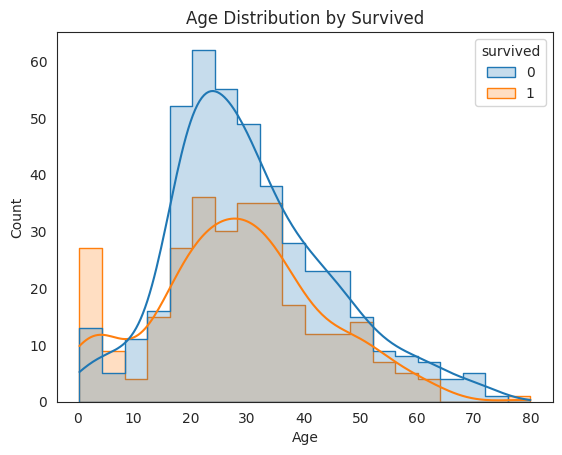

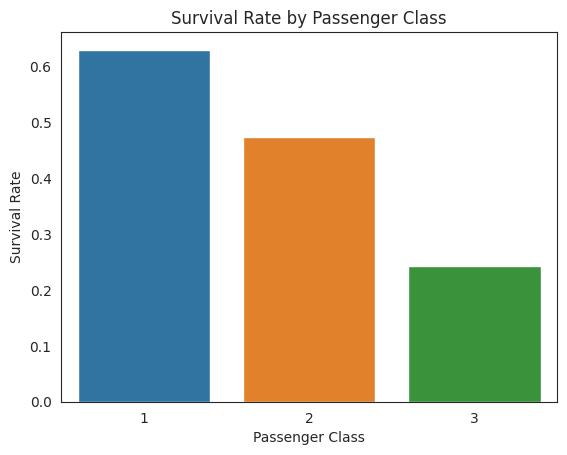

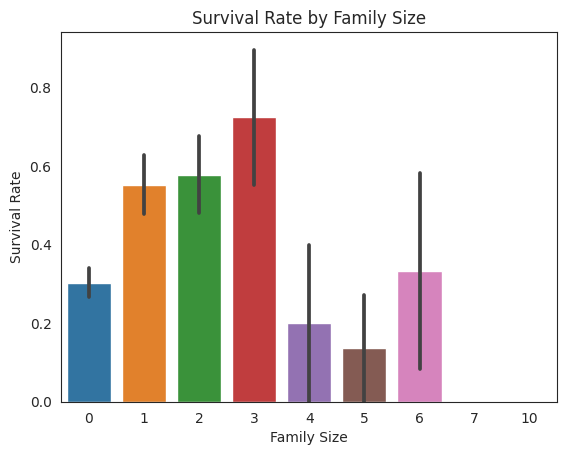

In [91]:
# Age Distribution by Survived
sns.histplot(data=df, x='age', hue='survived', element='step', kde=True)
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Survival Rate by Passenger Class
survival_by_pclass = df.groupby('pclass')['survived'].mean().reset_index()
sns.barplot(data=survival_by_pclass, x='pclass', y='survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Family Size and Survival
df['family_size'] = df['sibsp'] + df['parch']
sns.barplot(data=df, x='family_size', y='survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()